## Libraries

In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

## Data

In [ ]:
shopping_behavior = pd.DataFrame(pd.read_csv('shopping_behavior_updated.csv'))

#Drop Customer ID
shopping_behavior = shopping_behavior.iloc[:,1:]
shopping_behavior.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Initial Visualizations

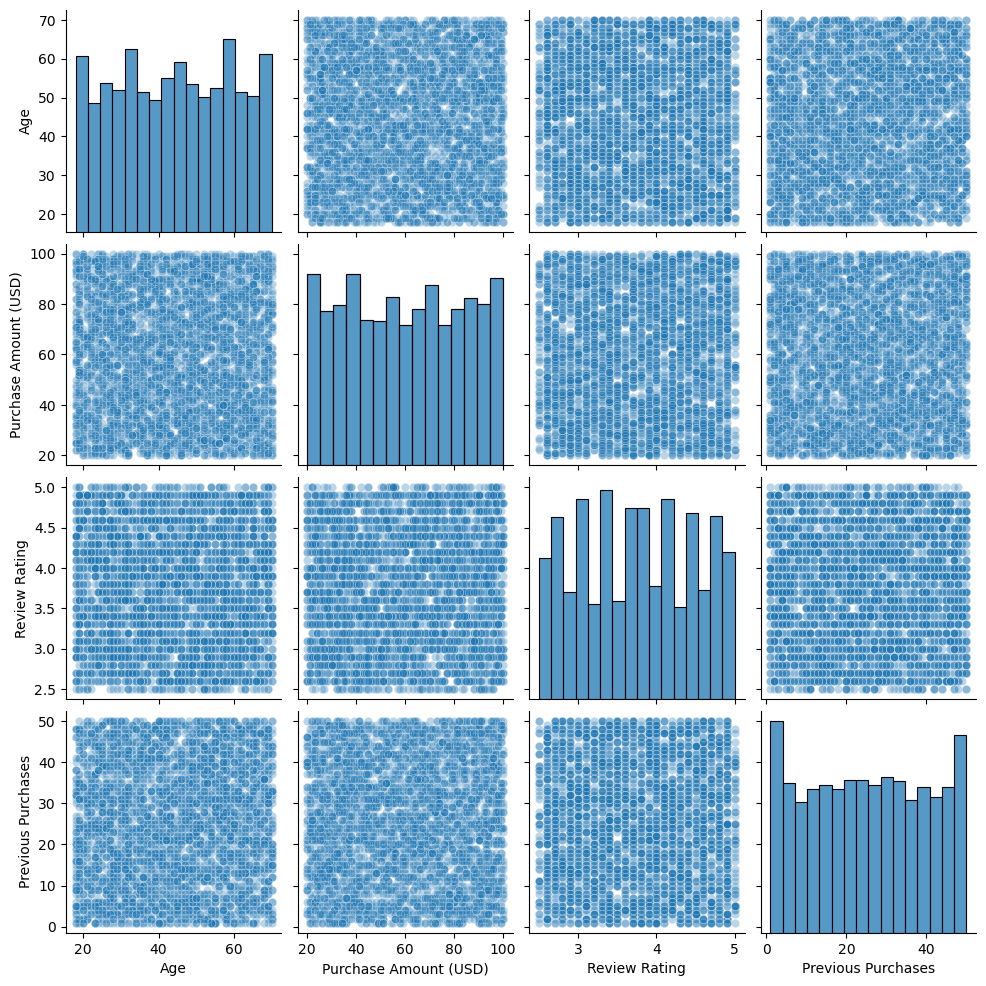

In [ ]:
# Pair plot of Numeric Variables
sns.pairplot(shopping_behavior, plot_kws={"alpha": 0.3})

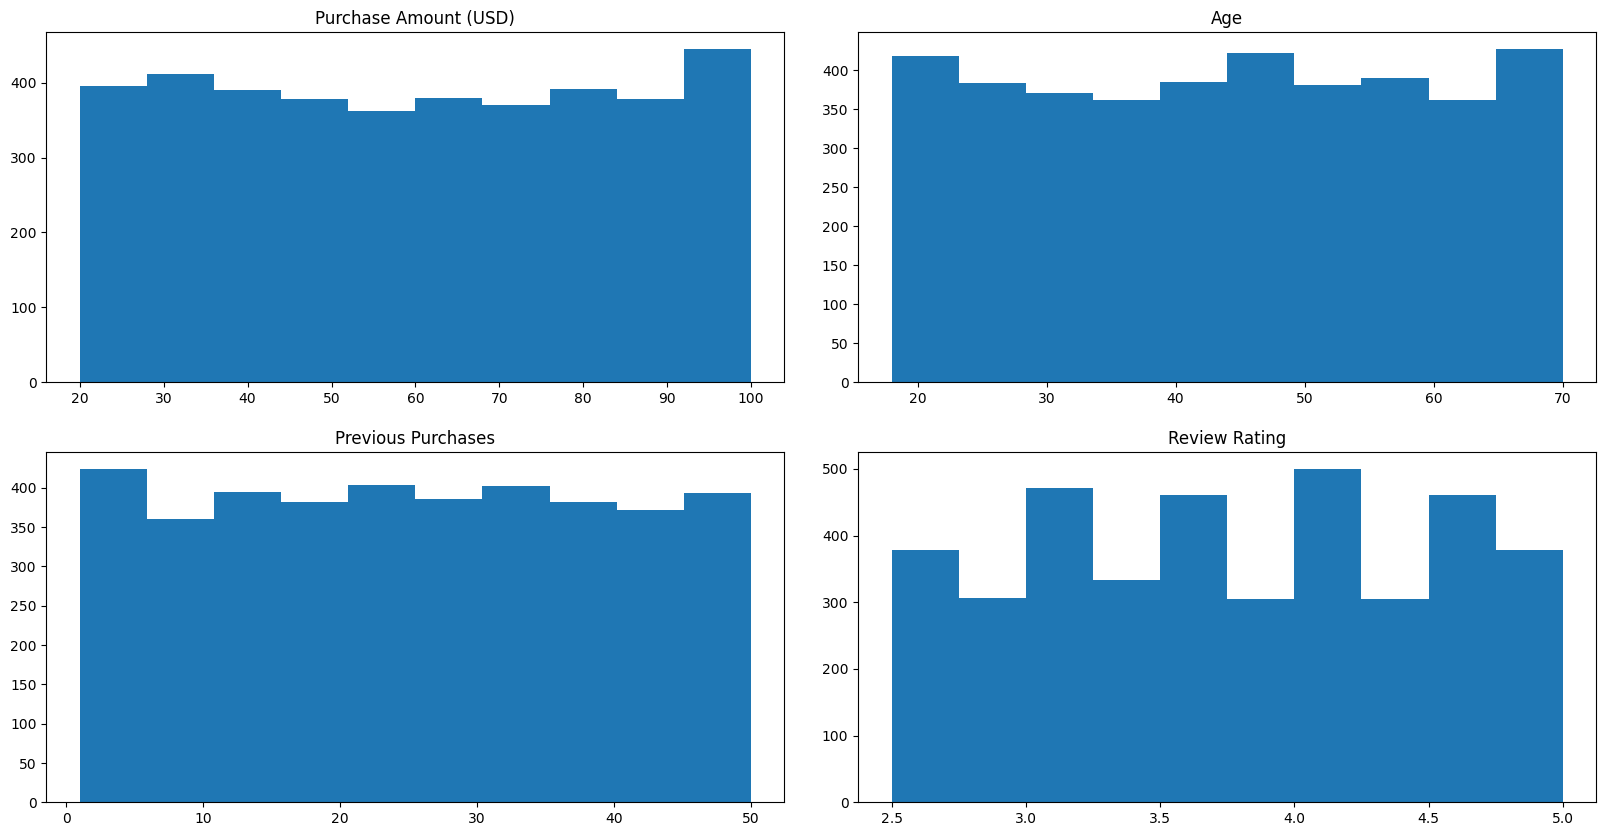

In [ ]:
# Histograms of Numeric Variables

fig, axes = plt.subplots(nrows = 2 , ncols = 2, figsize=(20, 10))

axes[0,0].hist(shopping_behavior['Purchase Amount (USD)'])
axes[0,0].title.set_text('Purchase Amount (USD)')
axes[0,1].hist(shopping_behavior['Age'])
axes[0,1].title.set_text('Age')
axes[1,0].hist(shopping_behavior['Previous Purchases'])
axes[1,0].title.set_text('Previous Purchases')
axes[1,1].hist(shopping_behavior['Review Rating'])
axes[1,1].title.set_text('Review Rating')

fig.subplots_adjust(wspace=0.1, hspace=0.2)

<AxesSubplot:xlabel='Category', ylabel='count'>

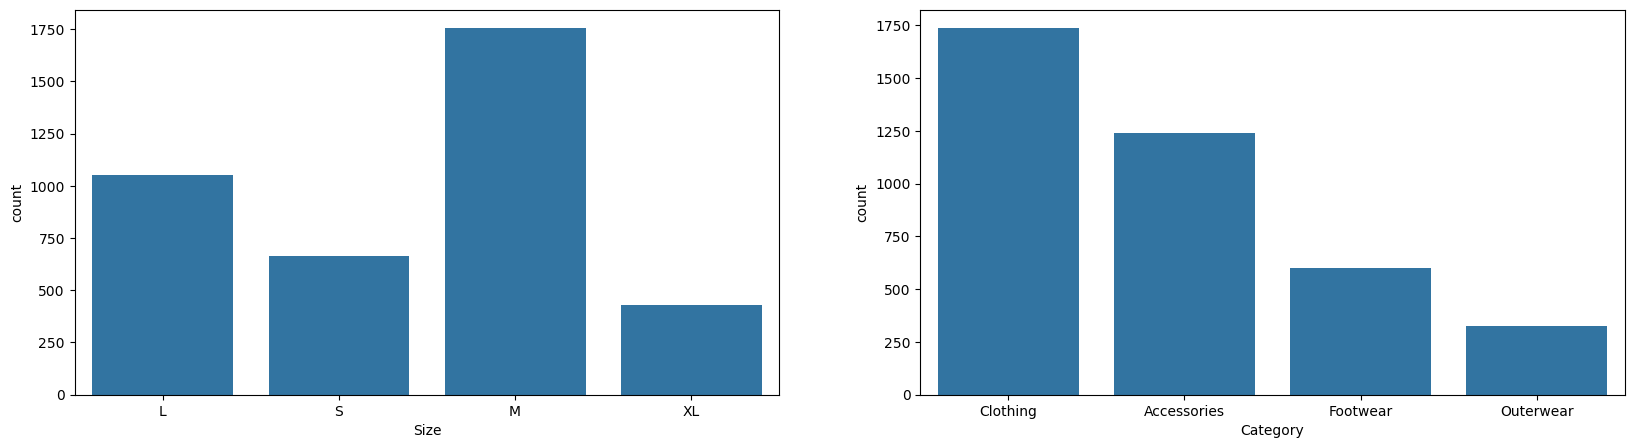

In [ ]:
#Bar charts of categorical variables - 1

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 5))

sns.countplot(data = shopping_behavior, x='Size', ax=ax1)
sns.countplot(data = shopping_behavior, x='Category', order=shopping_behavior['Category'].value_counts().index, ax = ax2)

<AxesSubplot:xlabel='Promo Code Used', ylabel='count'>

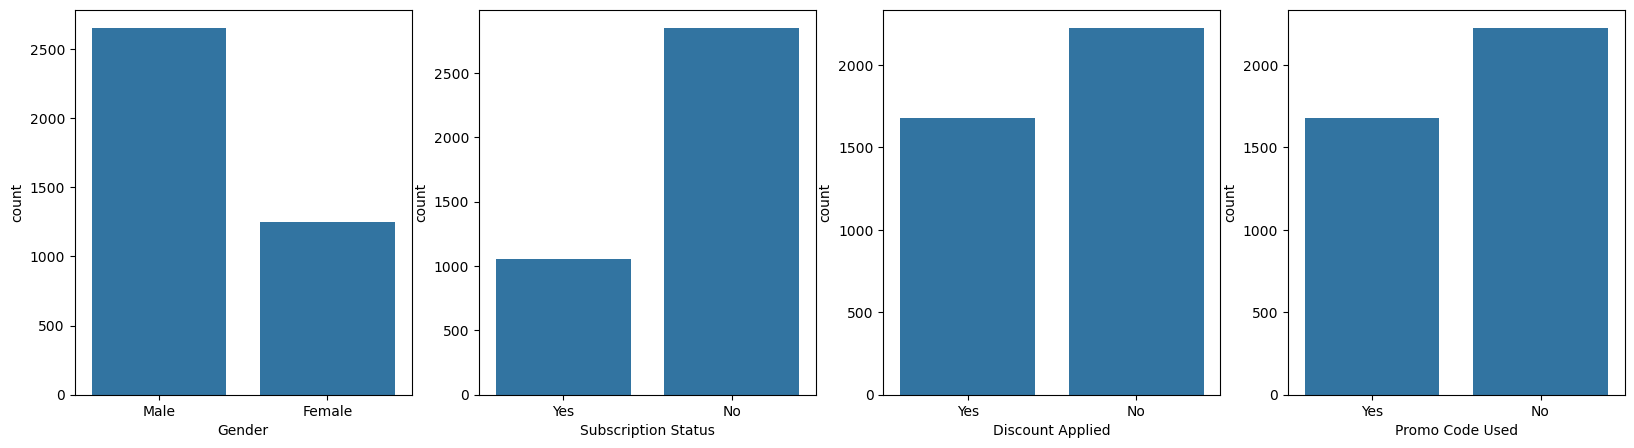

In [ ]:
#Bar charts of categorical variables - 2
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1 , ncols = 4, figsize=(20, 5))

sns.countplot(data = shopping_behavior, x='Gender', ax = ax1)
sns.countplot(data = shopping_behavior, x='Subscription Status', ax = ax2)
sns.countplot(data = shopping_behavior, x='Discount Applied', ax = ax3)
sns.countplot(data = shopping_behavior, x='Promo Code Used', ax = ax4)

<AxesSubplot:xlabel='Frequency of Purchases', ylabel='count'>

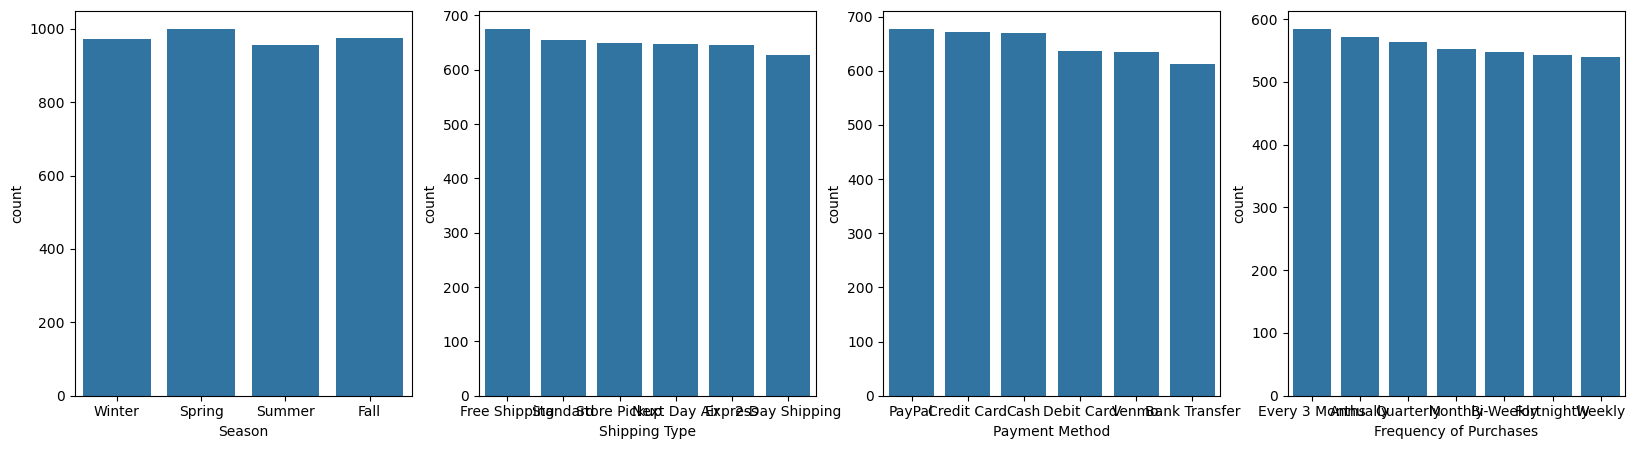

In [ ]:
#Bar charts of categorical variables - 3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1 , ncols = 4, figsize=(20, 5))

sns.countplot(data = shopping_behavior, x='Season', ax = ax1)
sns.countplot(data = shopping_behavior, x='Shipping Type', order=shopping_behavior['Shipping Type'].value_counts().index, ax = ax2)
sns.countplot(data = shopping_behavior, x='Payment Method', order=shopping_behavior['Payment Method'].value_counts().index, ax = ax3)
sns.countplot(data = shopping_behavior, x='Frequency of Purchases', order=shopping_behavior['Frequency of Purchases'].value_counts().index, ax = ax4)

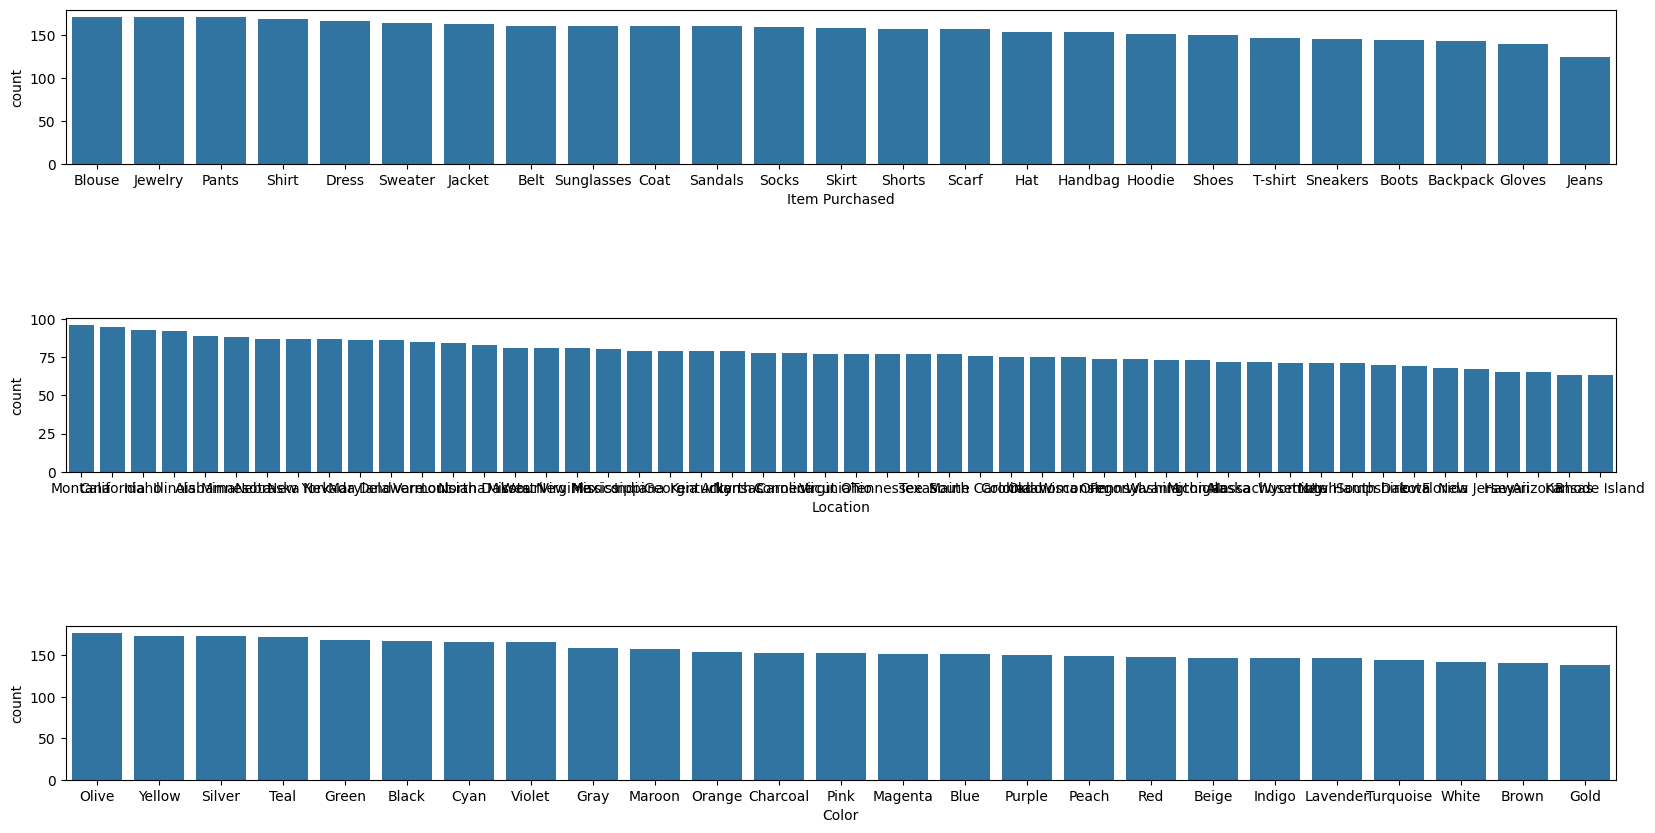

In [ ]:
#Bar charts of categorical variables - 4

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3 , ncols = 1, figsize=(20, 10))

sns.countplot(data = shopping_behavior, x='Item Purchased', order=shopping_behavior['Item Purchased'].value_counts().index, ax = ax1)
sns.countplot(data = shopping_behavior, x='Location', order=shopping_behavior['Location'].value_counts().index, ax = ax2)
sns.countplot(data = shopping_behavior, x='Color', order=shopping_behavior['Color'].value_counts().index, ax = ax3)

fig.subplots_adjust(hspace=1)

In [ ]:
# Category, Subscription Status, Size

### Preprocessing

In [ ]:
#  Encoding Categorical Data
shopping_dummies = pd.get_dummies(shopping_behavior)
shopping_dummies.head()
dummies =  shopping_dummies.iloc[:,4:]

In [ ]:
X = shopping_dummies.iloc[:,0:4]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

shopping_scaled = pd.concat([X_scaled, dummies], axis=1)

shopping_scaled.rename(
    columns={0: "Age_scaled", 1: "Purchase Amount (USD)_scaled",
             2: "Review Rating_scaled", 3: "Previous Purchases_scaled"},
    inplace=True)

X = shopping_scaled
shopping_scaled.head()

,Age_scaled,Purchase Amount (USD)_scaled,Review Rating_scaled,Previous Purchases_scaled,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,-0.285629,-0.907584,-0.785831,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,-1.648629,0.178852,-0.907584,-1.616552,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.390088,0.558882,-0.907584,-0.162789,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.517099,1.276716,-0.349027,1.637107,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.061263,-0.454531,-1.466141,0.391025,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


##  K Means

In [ ]:
# Testing cluster sizes for K-Means
n_clusters =  range(2, 5)

for n in n_clusters:
    kmeans = KMeans(n_clusters = n, init='k-means++', n_init = 'auto', max_iter = 300, random_state = 1)
    klabels = kmeans.fit_predict(X)
    print("\nn_clusters={}".format(n))
    print("Cluster sizes KMeans: {}".format(np.bincount(klabels)))
    print("Silhouette Score: {:.3f}".format(silhouette_score(X, klabels)))

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(



n_clusters=2
Cluster sizes KMeans: [1677 2223]
Silhouette Score: 0.098

n_clusters=3
Cluster sizes KMeans: [ 837 2223  840]
Silhouette Score: 0.069

n_clusters=4
Cluster sizes KMeans: [ 835 1125  842 1098]
Silhouette Score: 0.058


In [ ]:
kmeans2 = KMeans(n_clusters = 2, init='k-means++', n_init = 'auto', max_iter = 300, random_state = 1)
kmeans2.fit(X)

clustersK2 = kmeans2.predict(X)
print(clustersK2[:15])

shopping_behavior['K-Means Two Clusters'] = clustersK2
shopping_behavior.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,K-Means Two Clusters
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0


In [ ]:
kmeans3 = KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', max_iter = 300, random_state = 1)
kmeans3.fit(X)

clustersK3 = kmeans3.predict(X)
print(clustersK3[:15])

shopping_behavior['K-Means Three Clusters'] = clustersK3
shopping_behavior.head()

[0 0 0 0 0 0 0 0 0 2 2 2 2 2 2]


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,K-Means Two Clusters,K-Means Three Clusters
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,0
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,0
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,0
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,0
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,0


## Agglomerative

In [ ]:
n_clusters =  range(2, 5)

for n in n_clusters:
    agg = AgglomerativeClustering(n_clusters = n)
    alabels = agg.fit_predict(X)
    print("\nn_clusters={}".format(n))
    print("Cluster sizes agglomerative: {}".format(np.bincount(alabels)))
    print("Silhouette Score: {:.3f}".format(silhouette_score(X, alabels)))


n_clusters=2
Cluster sizes agglomerative: [2230 1670]
Silhouette Score: 0.098

n_clusters=3
Cluster sizes agglomerative: [1670 1429  801]
Silhouette Score: 0.054

n_clusters=4
Cluster sizes agglomerative: [1429 1013  801  657]
Silhouette Score: 0.038


In [ ]:
linkage =['ward', 'complete', 'average', 'single']

for l in linkage:
    agg = AgglomerativeClustering(n_clusters = 3, linkage = l)
    alabels= agg.fit_predict(X)
    print("\n linkage={}".format(l))
    print("Cluster sizes agglomerative: {}".format(np.bincount(alabels)))
    print("Rand Score: {:.3f}".format(silhouette_score(X, alabels)))


 linkage=ward
Cluster sizes agglomerative: [1670 1429  801]
Rand Score: 0.054

 linkage=complete
Cluster sizes agglomerative: [1804 1289  807]
Rand Score: 0.025

 linkage=average
Cluster sizes agglomerative: [2222 1677    1]
Rand Score: 0.068

 linkage=single
Cluster sizes agglomerative: [3898    1    1]
Rand Score: 0.018


## Visualization of Dimension Reduction - improved scores!

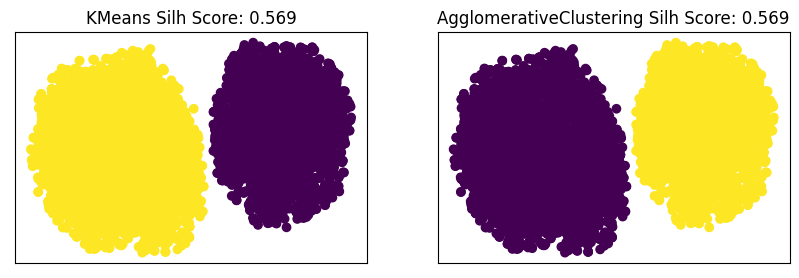

In [ ]:
tsne  = TSNE(n_components = 2, random_state = 1)
X_tsne = tsne.fit_transform(X)
fig, axes =  plt.subplots(1, 2, figsize =(10,3), subplot_kw={'xticks': (), 'yticks':()})
algorithms = [KMeans(n_clusters = 2, init='k-means++', n_init = 'auto', max_iter = 300, random_state = 1),
              AgglomerativeClustering(n_clusters = 2, linkage = 'ward')]

for ax, algorithm in zip(axes[0:], algorithms):
    clusters = algorithm.fit_predict(X_tsne)
    ax.scatter(X_tsne[:,0], X_tsne[:,1], c = clusters)
    ax.set_title("{} Silh Score: {:.3f}".format(algorithm.__class__.__name__, silhouette_score(X_tsne, clusters)))

In [ ]:
tsne  = TSNE(n_components = 2, random_state = 1)
X_tsne = tsne.fit_transform(X)
algorithm = KMeans(n_clusters = 2,  init='k-means++', n_init = 'auto', max_iter = 300, random_state = 1)
clustersTK2 = algorithm.fit_predict(X_tsne)

print(clustersTK2[:20])

shopping_behavior['Reduced K-Means Two Clusters'] = clustersTK2
shopping_behavior.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,K-Means Two Clusters,K-Means Three Clusters,Reduced K-Means Two Clusters
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,0,0
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,0,0
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,0,0
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,0,0
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,0,0


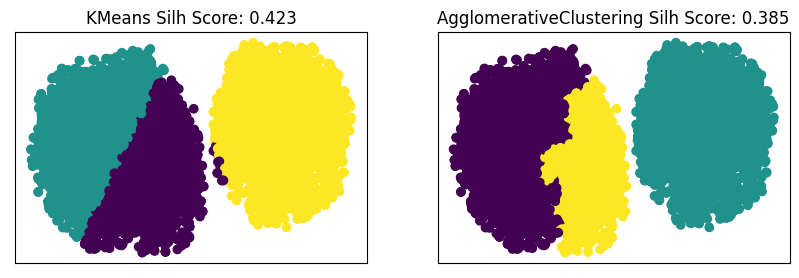

In [ ]:
tsne  = TSNE(n_components = 2, random_state = 1)
X_tsne = tsne.fit_transform(X)
fig, axes =  plt.subplots(1, 2, figsize =(10,3), subplot_kw={'xticks': (), 'yticks':()})
algorithms = [KMeans(n_clusters = 3, init='k-means++', n_init = 'auto', max_iter = 300, random_state = 1),
              AgglomerativeClustering(n_clusters = 3,  linkage = 'ward')]

for ax, algorithm in zip(axes[0:], algorithms):
    clusters = algorithm.fit_predict(X_tsne)
    ax.scatter(X_tsne[:,0], X_tsne[:,1], c = clusters)
    ax.set_title("{} Silh Score: {:.3f}".format(algorithm.__class__.__name__, silhouette_score(X_tsne, clusters)))

In [ ]:
tsne  = TSNE(n_components = 2, random_state = 1)
X_tsne = tsne.fit_transform(X)
algorithm = KMeans(n_clusters = 3,  init='k-means++', n_init = 'auto', max_iter = 300, random_state = 1)
clustersTK3 = algorithm.fit_predict(X_tsne)

print(clustersTK3[:20])

shopping_behavior['Reduced K-Means Three Clusters'] = clustersTK3
shopping_behavior.head()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,K-Means Two Clusters,K-Means Three Clusters,Reduced K-Means Two Clusters,Reduced K-Means Three Clusters
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,Express,Yes,Yes,14,Venmo,Fortnightly,0,0,0,2
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,...,Express,Yes,Yes,2,Cash,Fortnightly,0,0,0,2
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,0,0,2
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,0,0,2
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,...,Free Shipping,Yes,Yes,31,PayPal,Annually,0,0,0,2


## Cluster Labels from K-Means with Dimension Reduction

## Visualizaiton of Cluster Distributions

<AxesSubplot:xlabel='Gender', ylabel='count'>

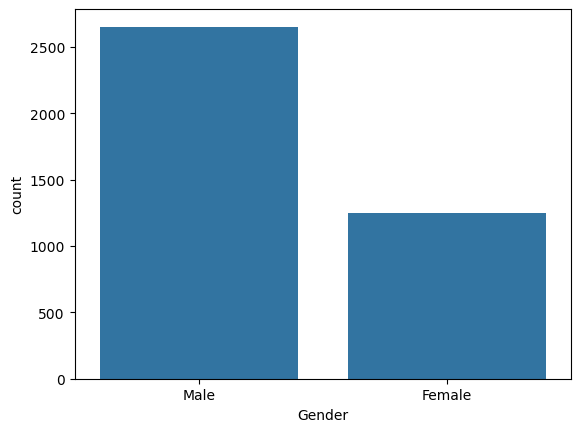

In [ ]:
sns.countplot(data = shopping_behavior, x='Gender')

<AxesSubplot:xlabel='Reduced K-Means Two Clusters', ylabel='count'>

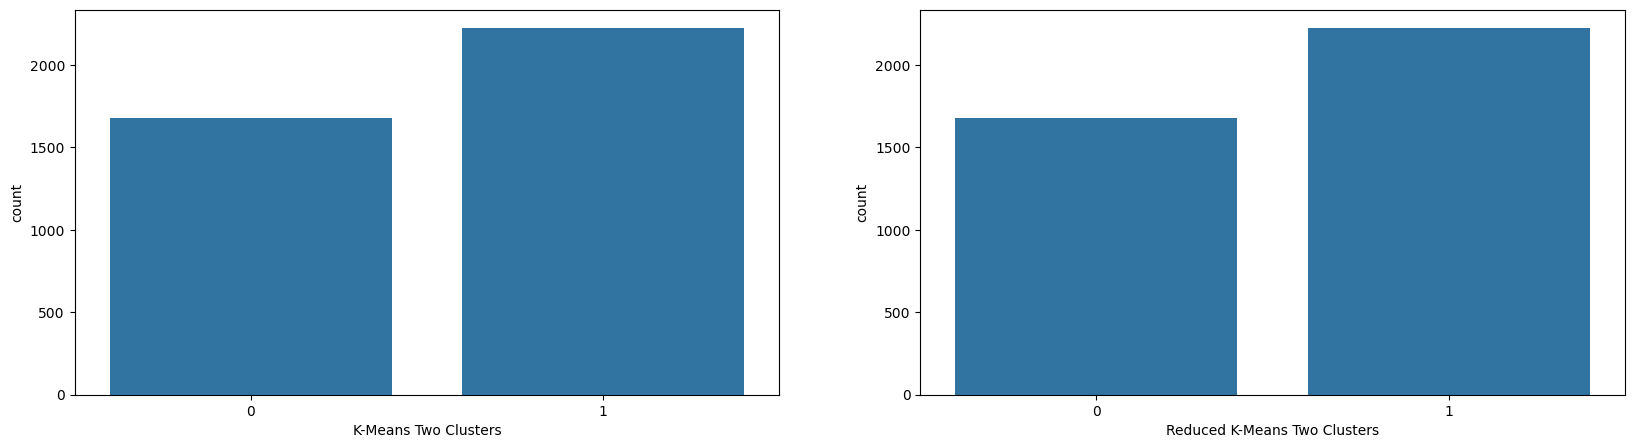

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 5))
sns.countplot(data = shopping_behavior, x='K-Means Two Clusters', ax=ax1)
sns.countplot(data = shopping_behavior, x='Reduced K-Means Two Clusters', ax=ax2)

<AxesSubplot:xlabel='Reduced K-Means Three Clusters', ylabel='count'>

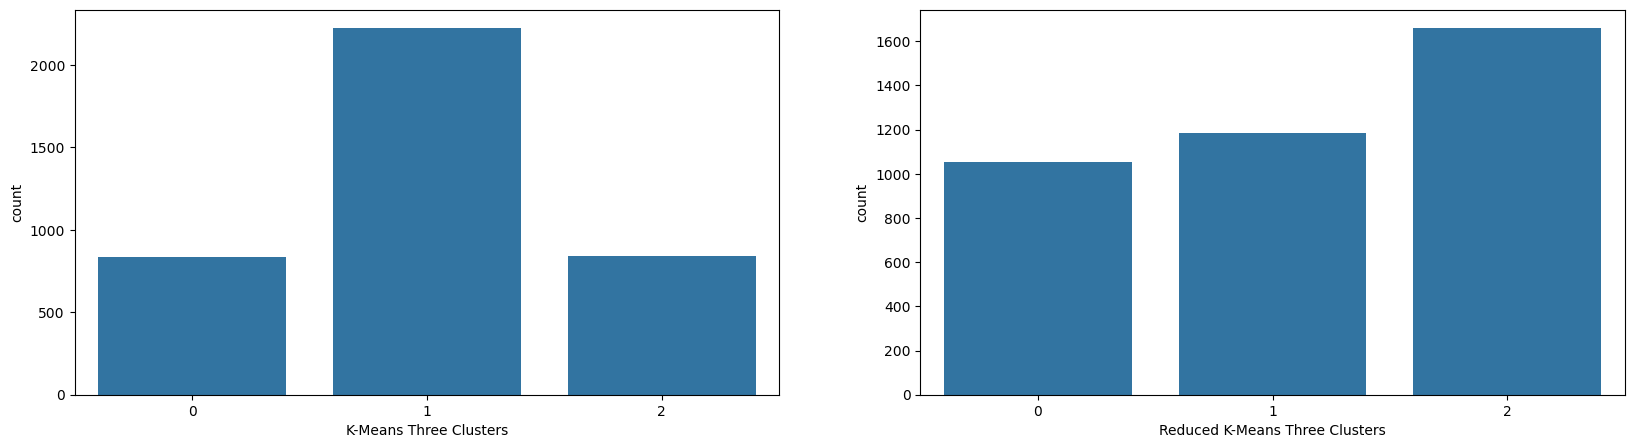

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 5))
sns.countplot(data = shopping_behavior, x='K-Means Three Clusters', ax=ax1)
sns.countplot(data = shopping_behavior, x='Reduced K-Means Three Clusters', ax=ax2)

<AxesSubplot:xlabel='Reduced K-Means Three Clusters', ylabel='count'>

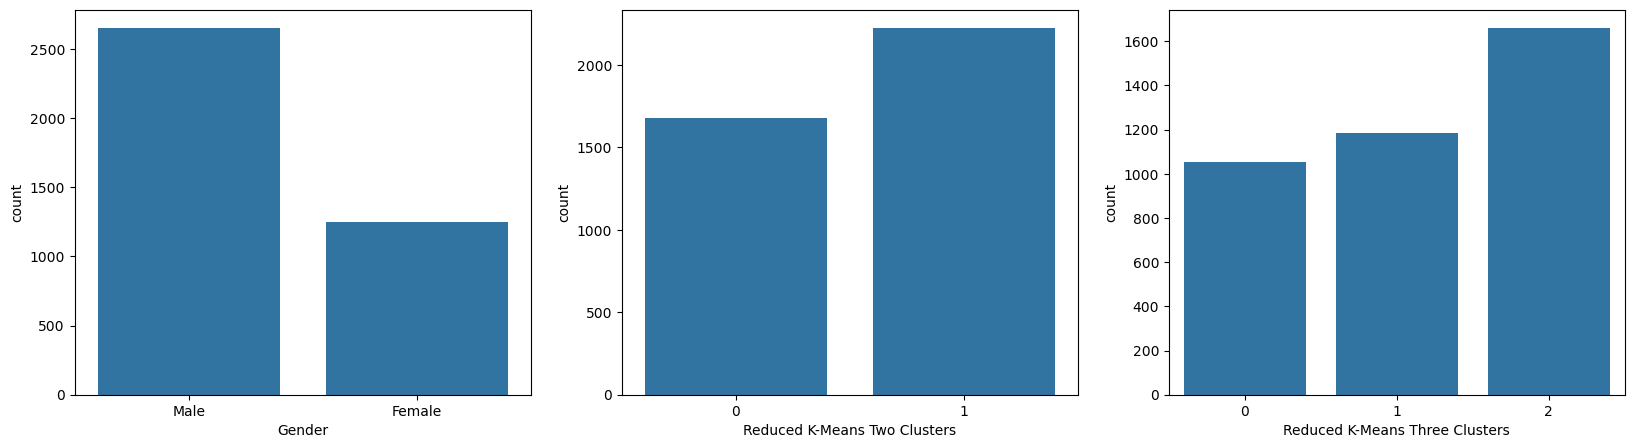

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))
sns.countplot(data = shopping_behavior, x='Gender', ax=ax1)
sns.countplot(data = shopping_behavior, x='Reduced K-Means Two Clusters', ax=ax2)
sns.countplot(data = shopping_behavior, x='Reduced K-Means Three Clusters', ax=ax3)

### Visualizations

## Exploring Two Clusters

<AxesSubplot:xlabel='Gender', ylabel='count'>

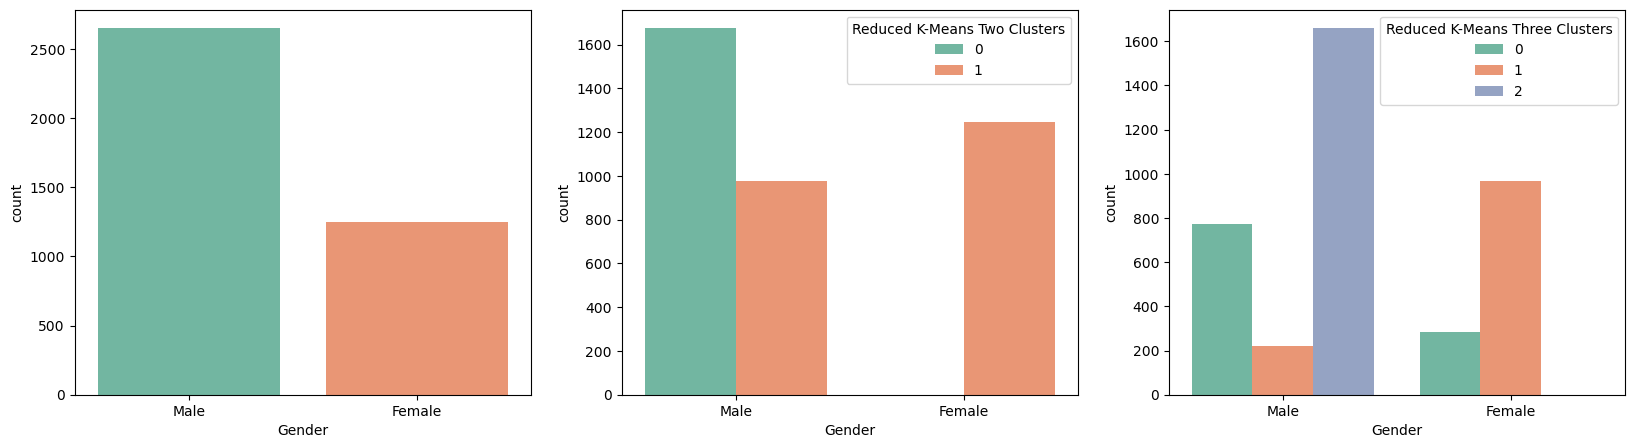

In [ ]:
# Gender Distribution of Clusters

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.countplot(data = shopping_behavior, x ='Gender', hue = 'Gender', ax=ax1, palette = 'Set2')
sns.countplot(data = shopping_behavior, x ='Gender', hue = 'Reduced K-Means Two Clusters', ax = ax2, palette = 'Set2')
sns.countplot(data = shopping_behavior, x ='Gender', hue = 'Reduced K-Means Three Clusters', ax = ax3, palette = 'Set2')

<AxesSubplot:xlabel='Subscription Status', ylabel='count'>

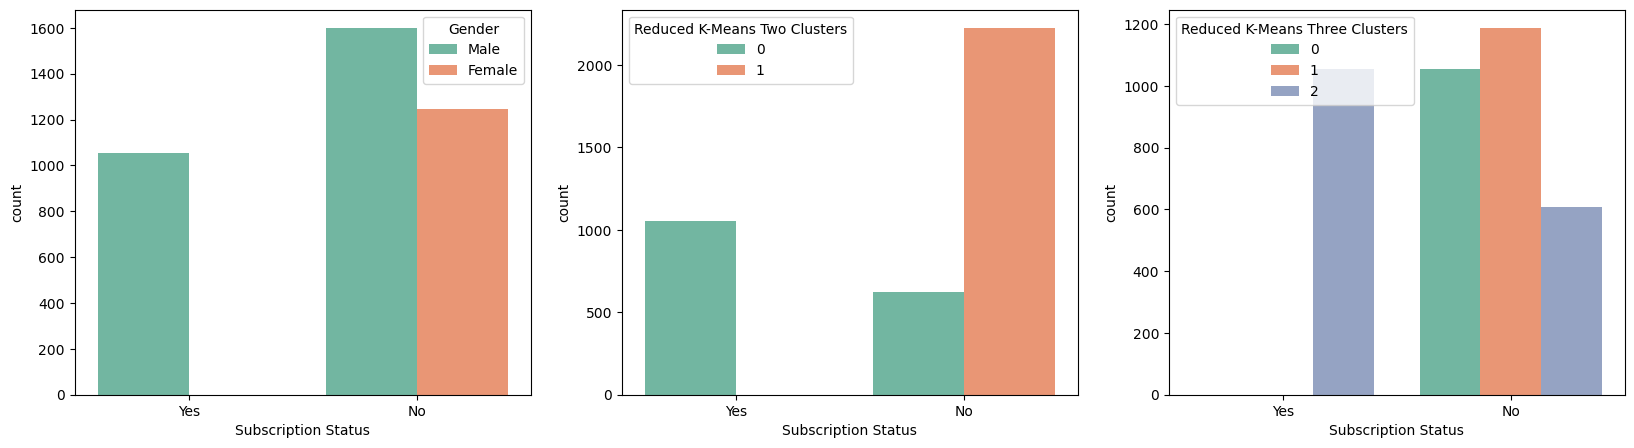

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.countplot(x="Subscription Status", hue='Gender', data=shopping_behavior , ax = ax1, palette = 'Set2')
sns.countplot(x="Subscription Status", hue='Reduced K-Means Two Clusters', data=shopping_behavior , ax = ax2, palette = 'Set2')
sns.countplot(x="Subscription Status", hue='Reduced K-Means Three Clusters', data=shopping_behavior , ax = ax3, palette = 'Set2')

## Exploring Three Clusters

<AxesSubplot:xlabel='Purchase Amount (USD)', ylabel='Density'>

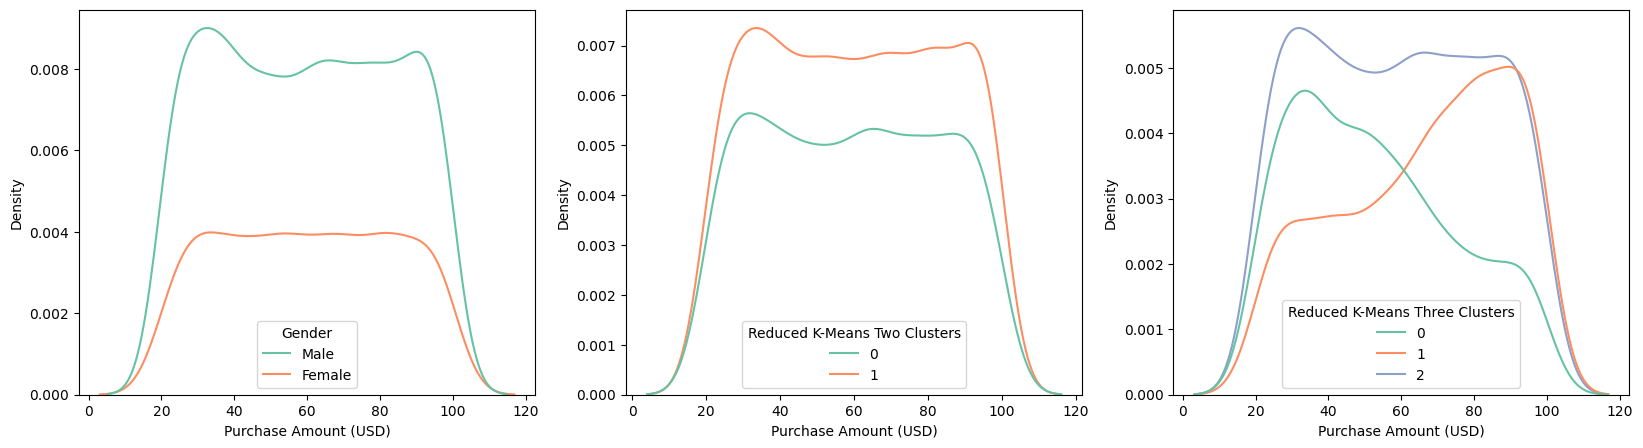

In [ ]:
# Purchase Amount Distributions by Cluster

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.kdeplot(data = shopping_behavior, x='Purchase Amount (USD)', hue = 'Gender', ax=ax1, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Purchase Amount (USD)', hue = 'Reduced K-Means Two Clusters', ax = ax2, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Purchase Amount (USD)', hue = 'Reduced K-Means Three Clusters', ax = ax3, palette = 'Set2')

<AxesSubplot:xlabel='Age', ylabel='Density'>

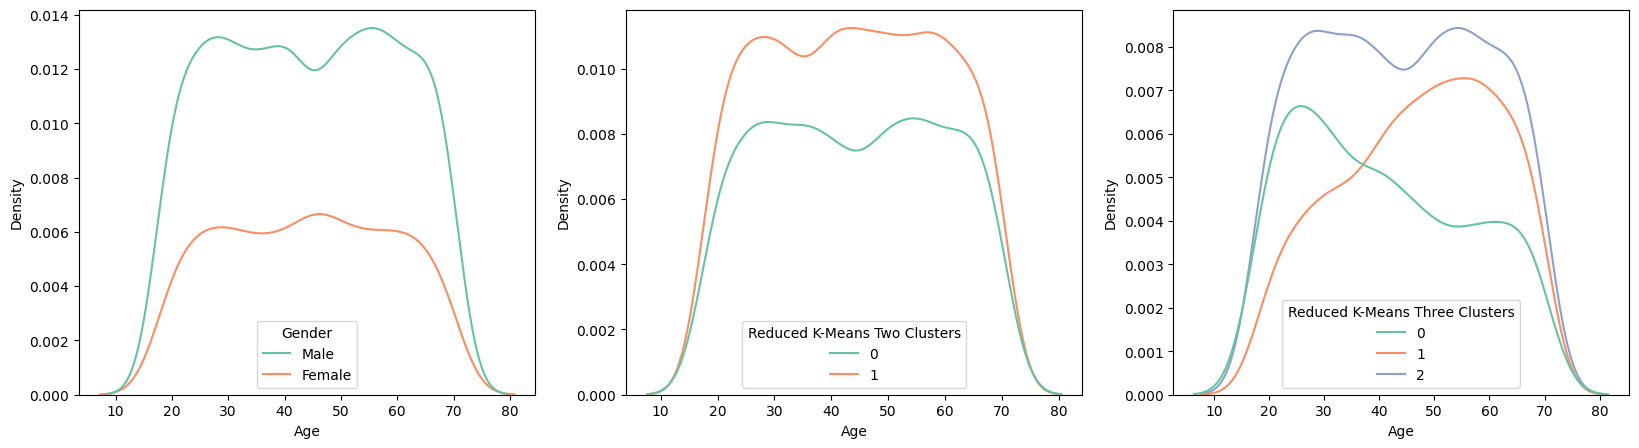

In [ ]:
# Age Distributions by Cluster

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.kdeplot(data = shopping_behavior, x='Age', hue = 'Gender', ax=ax1, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Age', hue = 'Reduced K-Means Two Clusters', ax = ax2, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Age', hue = 'Reduced K-Means Three Clusters', ax = ax3, palette = 'Set2')

<AxesSubplot:xlabel='Age', ylabel='Density'>

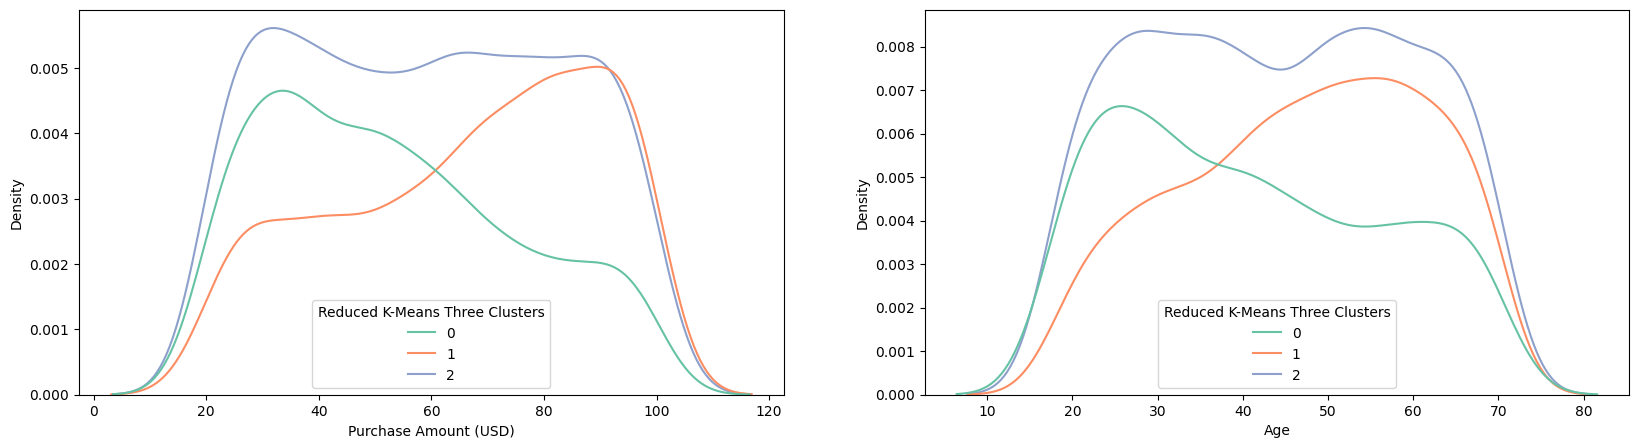

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 5))

sns.kdeplot(data = shopping_behavior, x='Purchase Amount (USD)', hue = 'Reduced K-Means Three Clusters', ax = ax1, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Age', hue = 'Reduced K-Means Three Clusters', ax = ax2, palette = 'Set2')

<AxesSubplot:xlabel='Previous Purchases', ylabel='Density'>

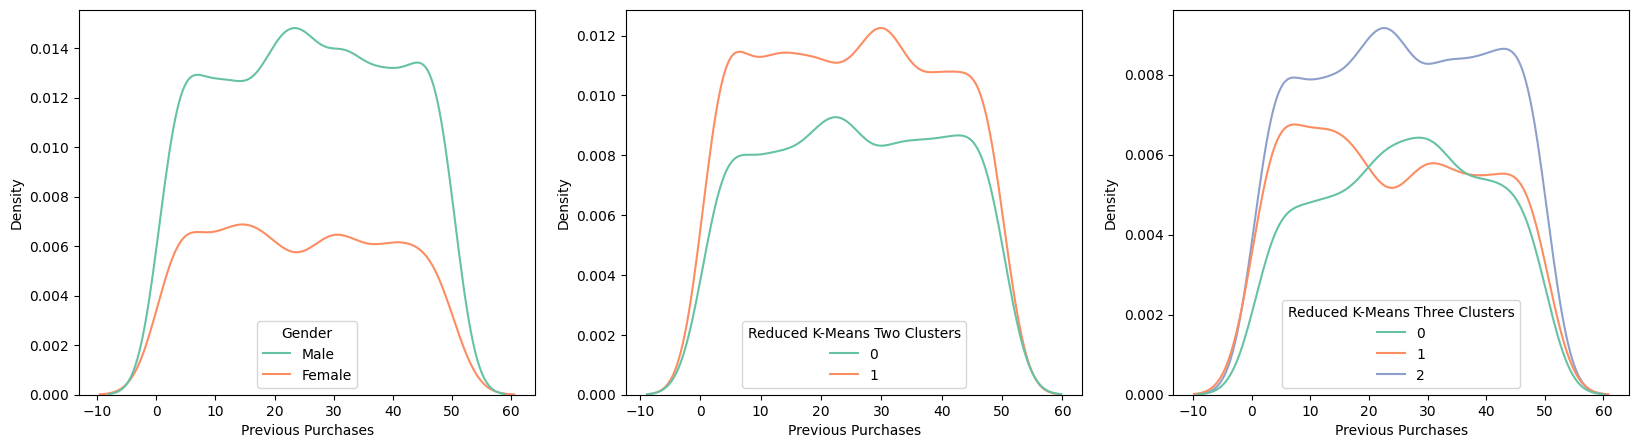

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.kdeplot(data = shopping_behavior, x='Previous Purchases', hue = 'Gender', ax=ax1, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Previous Purchases', hue = 'Reduced K-Means Two Clusters', ax = ax2, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Previous Purchases', hue = 'Reduced K-Means Three Clusters', ax = ax3, palette = 'Set2')

<AxesSubplot:xlabel='Review Rating', ylabel='Density'>

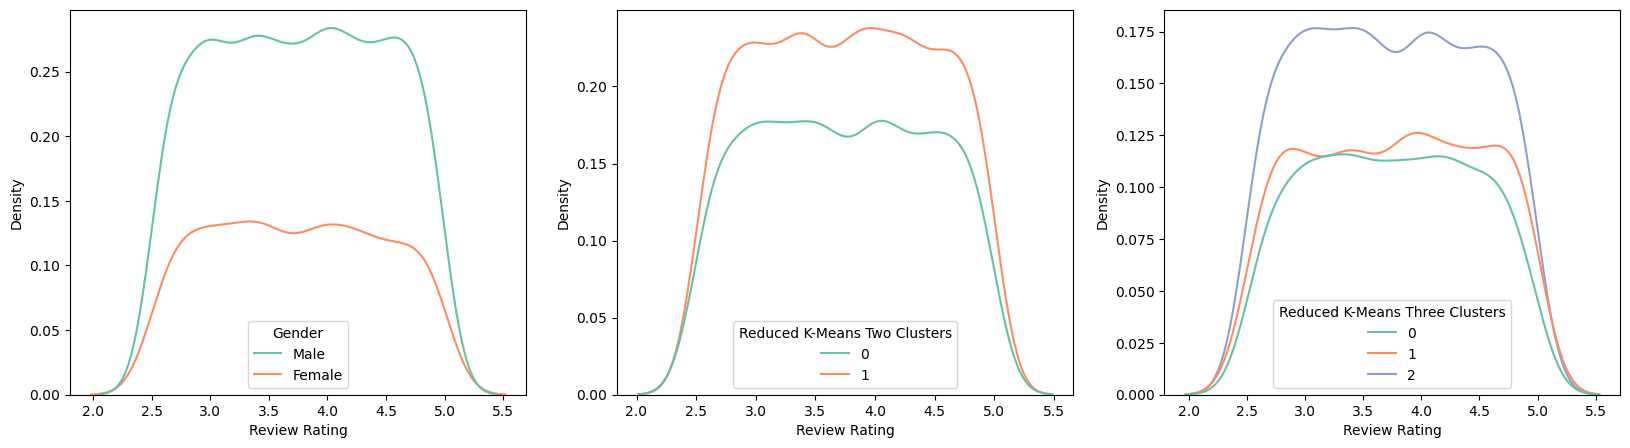

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.kdeplot(data = shopping_behavior, x='Review Rating', hue = 'Gender', ax=ax1, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Review Rating', hue = 'Reduced K-Means Two Clusters', ax = ax2, palette = 'Set2')
sns.kdeplot(data = shopping_behavior, x='Review Rating', hue = 'Reduced K-Means Three Clusters', ax = ax3, palette = 'Set2')

## More Purchase Amount and Age



<AxesSubplot:xlabel='Size', ylabel='count'>

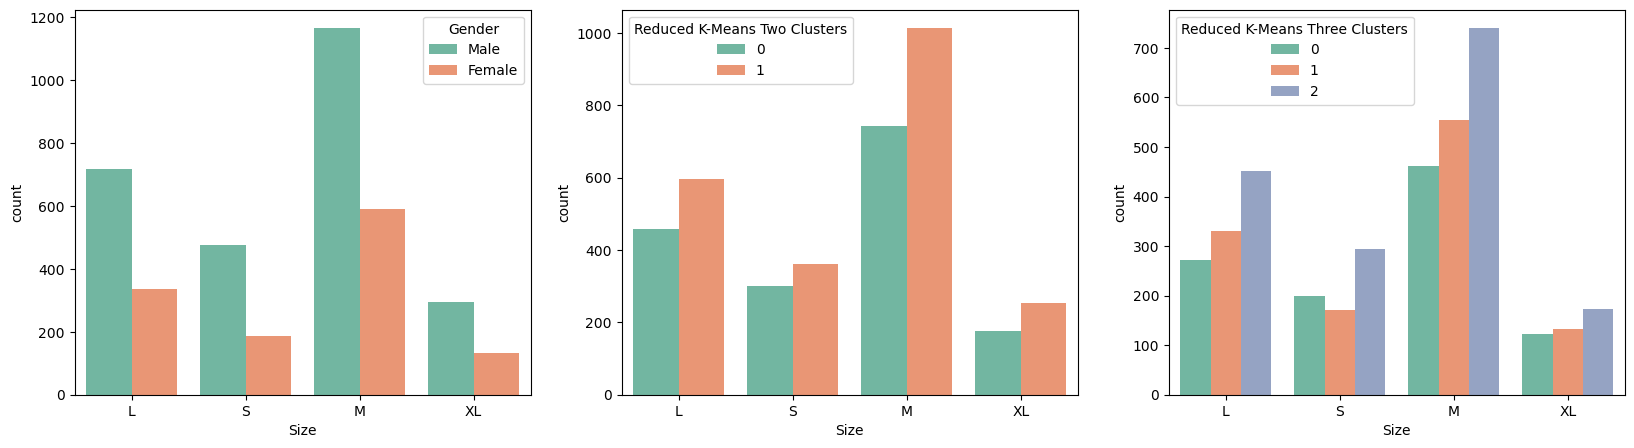

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.countplot(x="Size", hue='Gender', data=shopping_behavior , ax = ax1, palette = 'Set2')
sns.countplot(x="Size", hue='Reduced K-Means Two Clusters', data=shopping_behavior , ax = ax2, palette = 'Set2')
sns.countplot(x="Size", hue='Reduced K-Means Three Clusters', data=shopping_behavior , ax = ax3, palette = 'Set2')

<AxesSubplot:xlabel='Category', ylabel='count'>

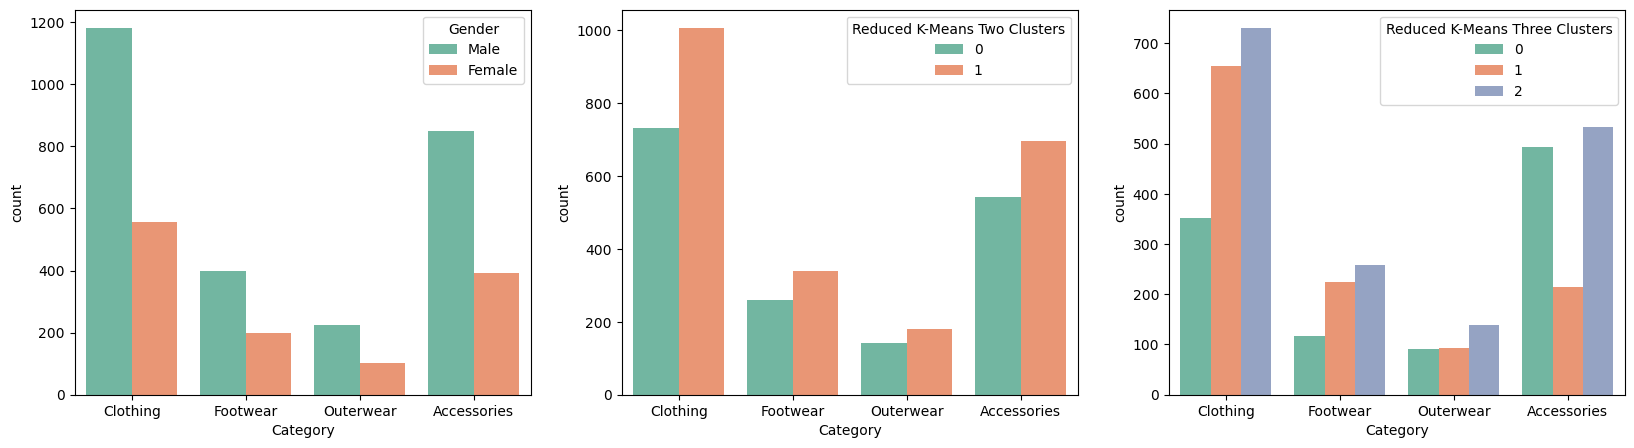

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 5))

sns.countplot(x="Category", hue='Gender', data=shopping_behavior , ax = ax1, palette = 'Set2')
sns.countplot(x="Category", hue='Reduced K-Means Two Clusters', data=shopping_behavior , ax = ax2, palette = 'Set2')
sns.countplot(x="Category", hue='Reduced K-Means Three Clusters', data=shopping_behavior , ax = ax3, palette = 'Set2')

__